In [1]:
# Cheng S et al. A pan-cancer single-cell transcriptional atlas of tumor infiltrating myeloid cells. Cell 2021 
# https://www.sciencedirect.com/science/article/pii/S0092867421000106
# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE154763

In [2]:
#!mkdir data
#!mkdir write
#!mkdir figures

In [3]:
import time; start = time.time()

In [4]:
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
#import sc_toolbox.api as sct
import seaborn as sns
import pandas as pd
import scanpy as sc
import numpy as np
sc.logging.print_version_and_date()

Running Scanpy 1.9.1, on 2022-10-08 18:50.


In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [6]:
sc.settings.set_figure_params(scanpy=True, dpi=150, dpi_save=150, color_map='coolwarm',facecolor='white',
                             format='png', transparent=False, frameon=False, vector_friendly=True, fontsize=14)
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==0.24.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.6


In [7]:
results_file = './write/pbmc3k.h5ad' # the file that will store the analysis results

In [8]:
adata = sc.read(
    results_file,                  # data file
    var_names='gene_symbols',      # use gene symbols for the variable names (variables-axis index)
    cache=True)                    # write a cache file for faster subsequent reading
adata.uns['log1p']["base"] = None  # Fix " KeyError: 'base' "

In [9]:
adata

AnnData object with n_obs × n_vars = 6254 × 2221
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

In [10]:
adata.obs_names = [f"Cell_{i}" for i in range(adata.n_obs)]
adata.var_names = [f"Gene_{i}" for i in range(adata.n_vars)]

In [10]:
print(adata.obs_names[:5], end="\n"); 
print(adata.var_names[:5])

Index(['Cell_0', 'Cell_1', 'Cell_2', 'Cell_3', 'Cell_4'], dtype='object')
Index(['Gene_0', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4'], dtype='object')


In [11]:
# define a list of marker genes for later reference.
marker_genes = ['IL7R', 'CD8A', 'LYZ', 'CD14', 'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'FCGR3A', 'MS4A7',
                'FCER1A', 'CST3', 'PPBP']

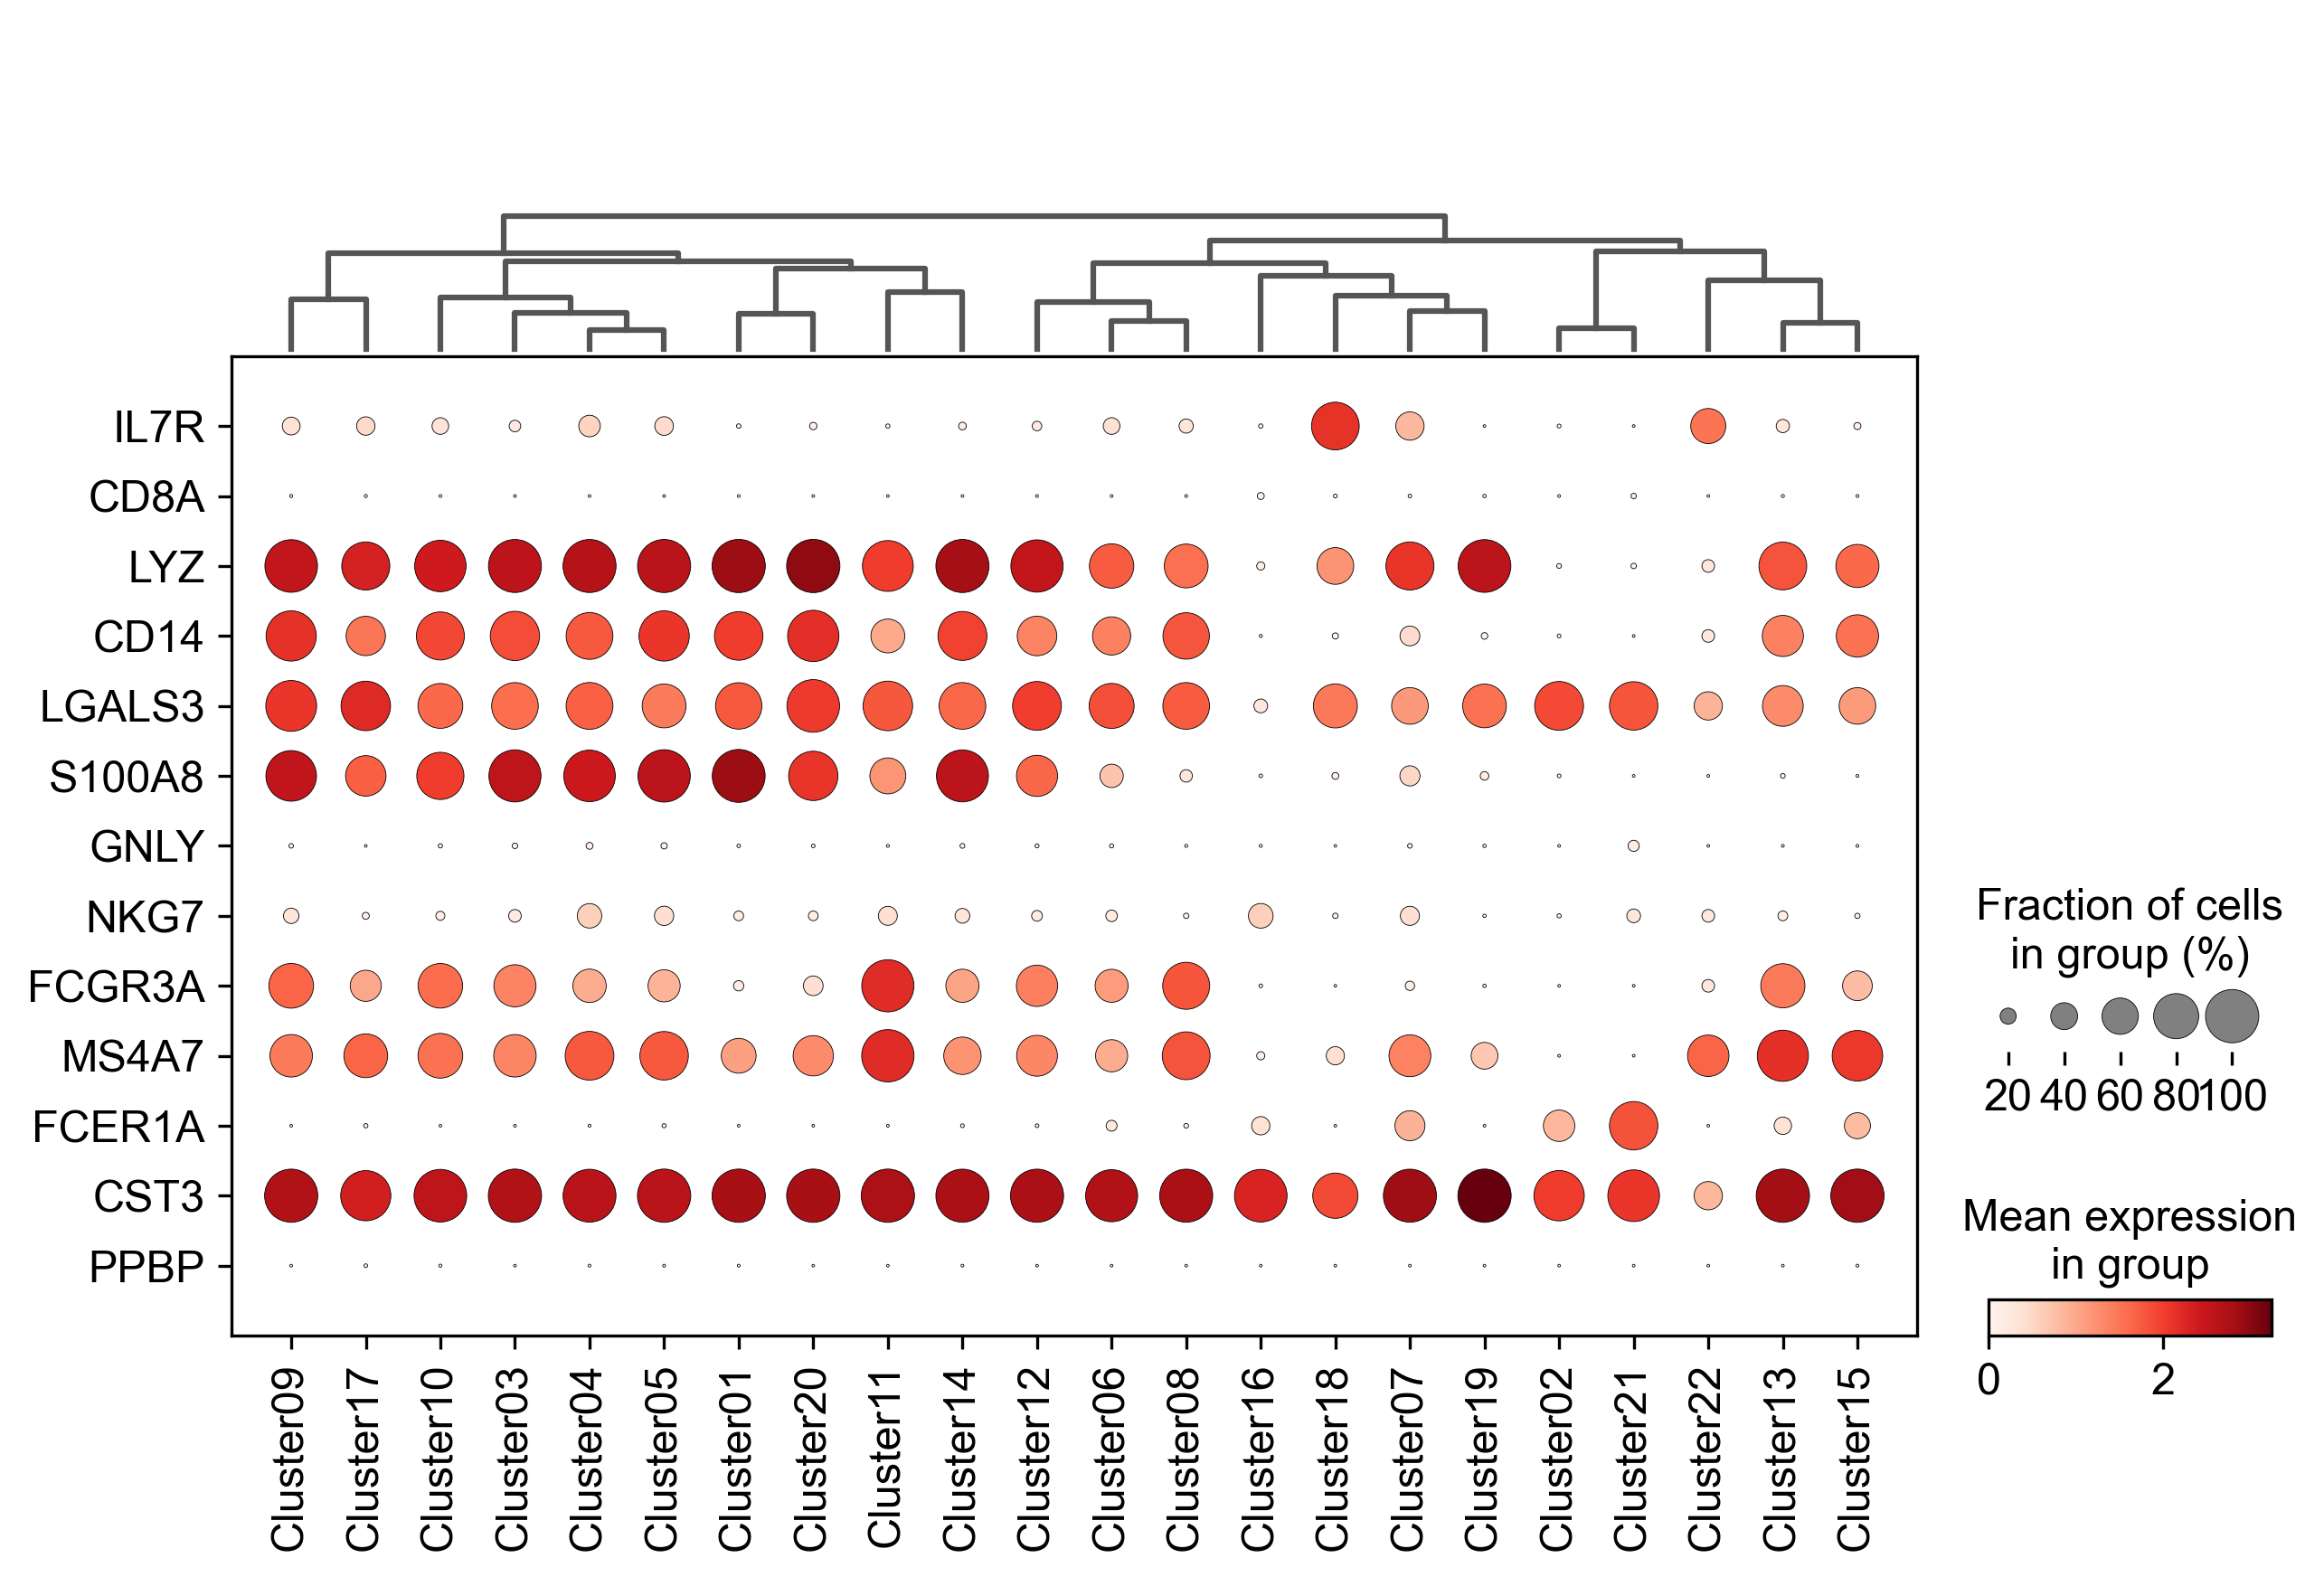

<Figure size 600x600 with 0 Axes>

In [12]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden', dendrogram=True,
              swap_axes=True, smallest_dot=0.5, norm=None)
plt.tight_layout(); plt.savefig("./figures/04a.DotPlot_leiden.png", bbox_inches="tight")

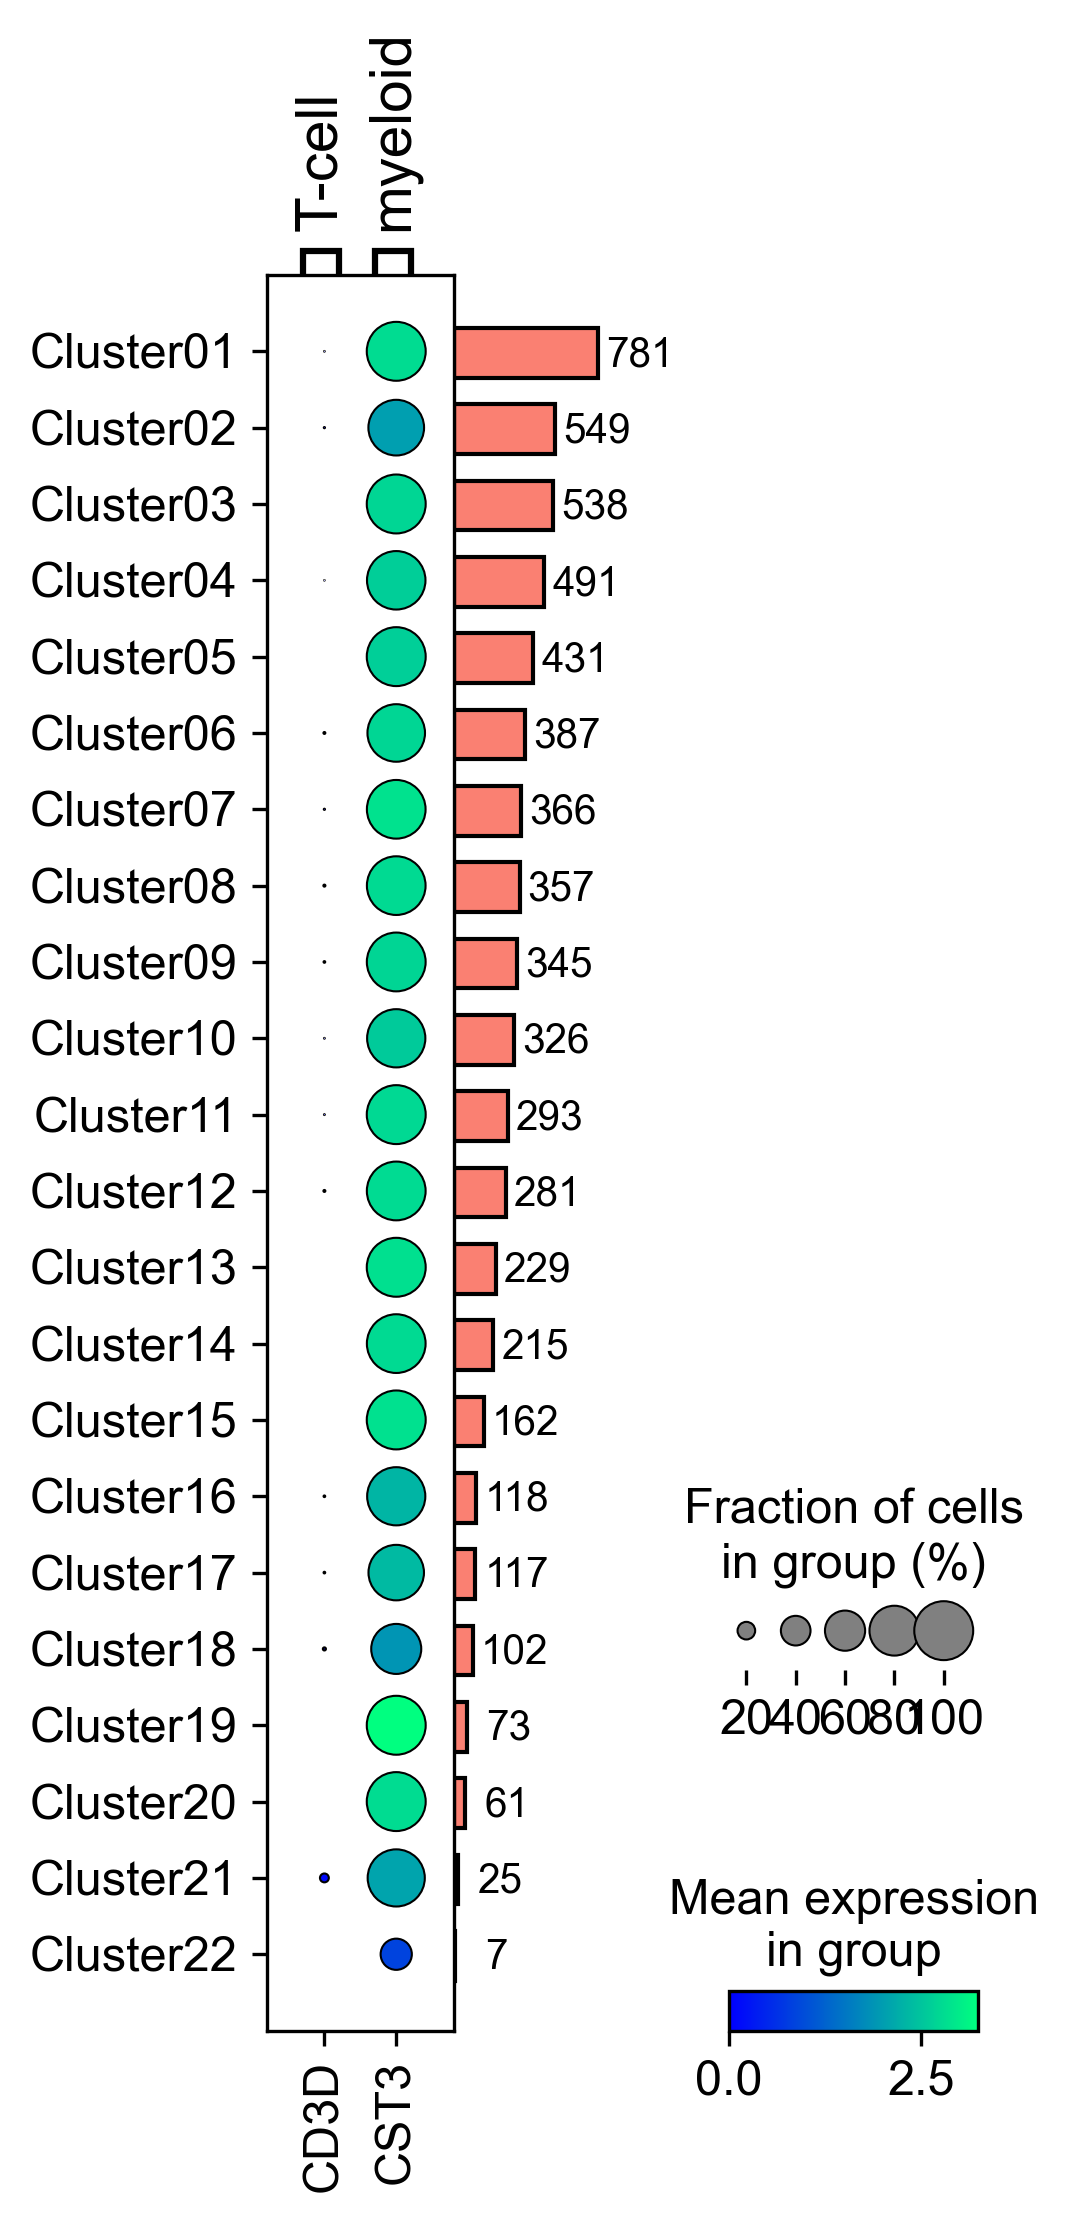

In [13]:
markers = {'T-cell': 'CD3D', 'myeloid': 'CST3'}
dp = sc.pl.dotplot(adata, markers, groupby='leiden', return_fig=True)
dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

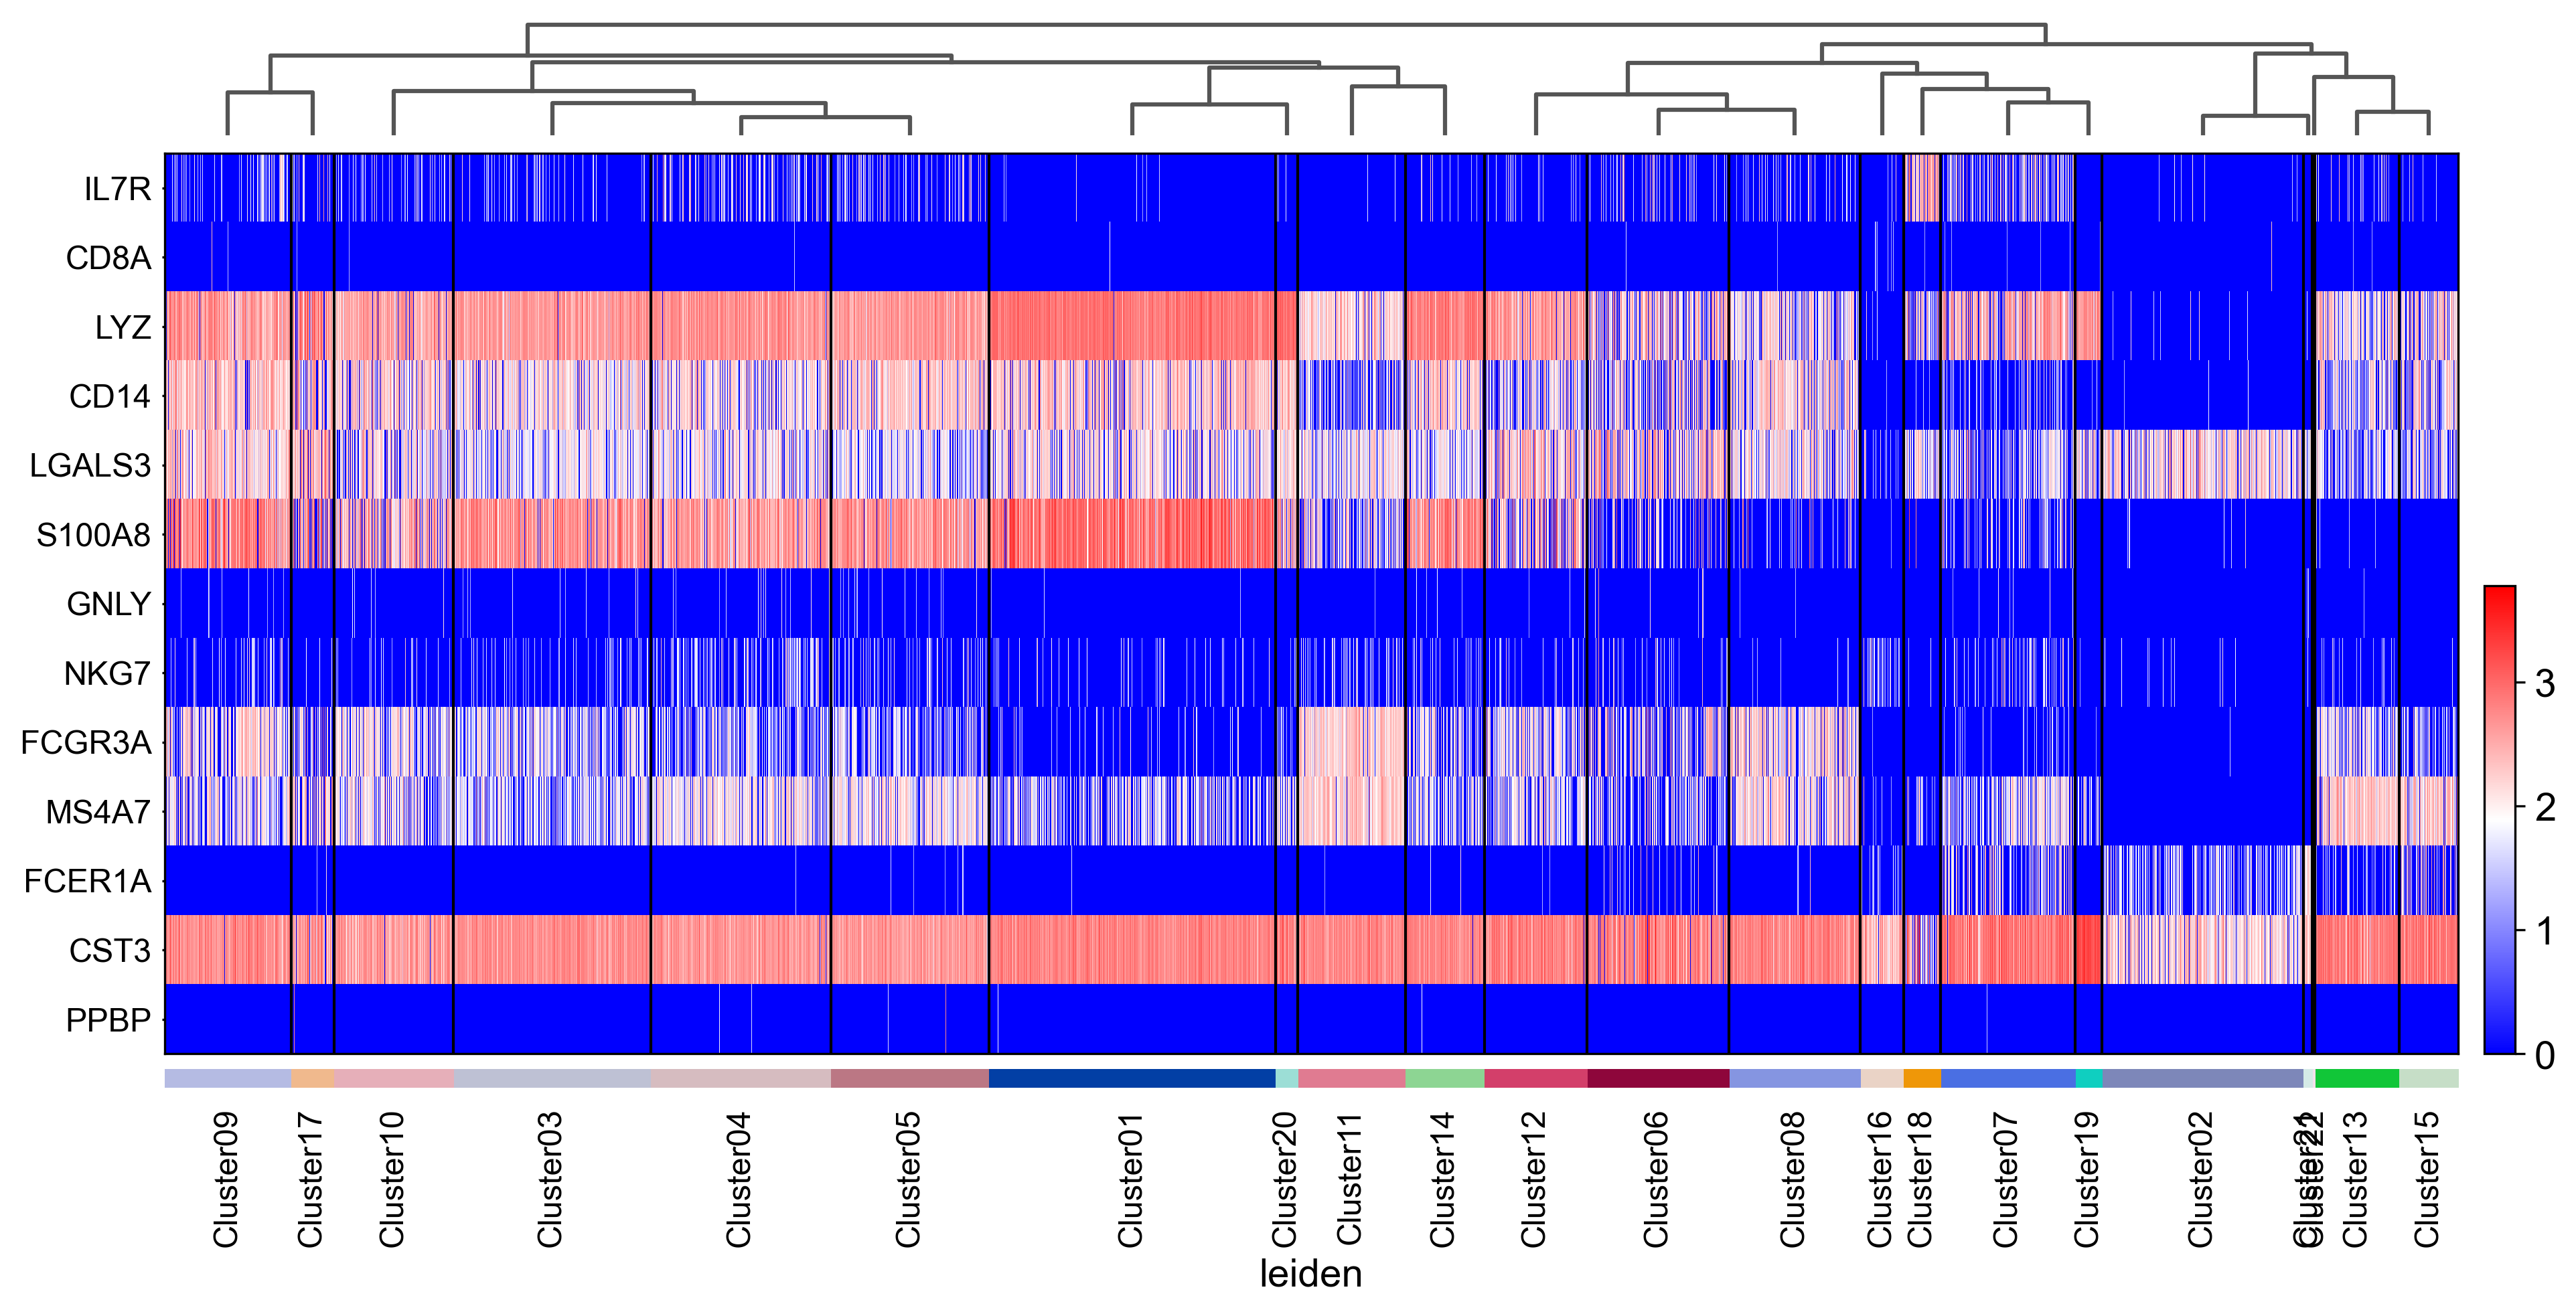

In [14]:
sc.pl.heatmap(adata, marker_genes, groupby='leiden', swap_axes=True, dendrogram=True,cmap='bwr',show=False,
             figsize=(15,7), var_group_rotation=0) #save='ClusterMap.png'
plt.tight_layout(); plt.savefig("./figures/04h.HeatMap_leiden.png", bbox_inches="tight")

In [15]:
print("'04_Visualization.v001' script run time:", f'{time.time()-start:.0f}', "seconds.")

'04_Visualization.v001' script run time: 14 seconds.
